# 1. Business Understanding

pada tahap ini dibutuhkan pemahaman tentang data yang relevan dengan kalori bedasarkan ca fat total fat dan trans fat

# 2. Data Understanding

data understanding berisi tentang pengolahan data yang akan digunakan untuk proses analisis.pada data yang didapat terdapat 10 kolom dengan atribut sebagai berikut:

 0   restaurant   301 non-null    object 
 1   item         301 non-null    object 
 2   calories     301 non-null    int64  
 3   cal_fat      301 non-null    int64  
 4   total_fat    301 non-null    int64  
 5   sat_fat      301 non-null    float64
 6   trans_fat    301 non-null    float64
 7   cholesterol  301 non-null    int64  
 8   sodium       301 non-null    int64  
 9   total_carb   301 non-null    int64  
 10  fiber        301 non-null    float64
 11  sugar        301 non-null    int64  
 12  protein      301 non-null    float64
 13  vit_a        301 non-null    float64
 14  vit_c        301 non-null    float64
 15  calcium      301 non-null    float64
 16  salad        301 non-null    object 
 



# 3. Data Preparation

Pada tahap ini data yang telah didapat akan diolah dan dipilih lagi agar sesuai dengan analisis. pada data yang saya dapat diambil dari jumlah kalori bedasarkan cal fat total fat  dan trans fat

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Memanggil Dataset

In [17]:
df_raw = pd.read_csv('fastfood.csv')

# Menghapus dataset yang bernilai empty/kosong

In [18]:
df = df_raw.dropna()

# Deskripsi Dataset

In [19]:
df.head()

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 0 to 510
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   restaurant   301 non-null    object 
 1   item         301 non-null    object 
 2   calories     301 non-null    int64  
 3   cal_fat      301 non-null    int64  
 4   total_fat    301 non-null    int64  
 5   sat_fat      301 non-null    float64
 6   trans_fat    301 non-null    float64
 7   cholesterol  301 non-null    int64  
 8   sodium       301 non-null    int64  
 9   total_carb   301 non-null    int64  
 10  fiber        301 non-null    float64
 11  sugar        301 non-null    int64  
 12  protein      301 non-null    float64
 13  vit_a        301 non-null    float64
 14  vit_c        301 non-null    float64
 15  calcium      301 non-null    float64
 16  salad        301 non-null    object 
dtypes: float64(7), int64(7), object(3)
memory usage: 42.3+ KB


<Axes: >

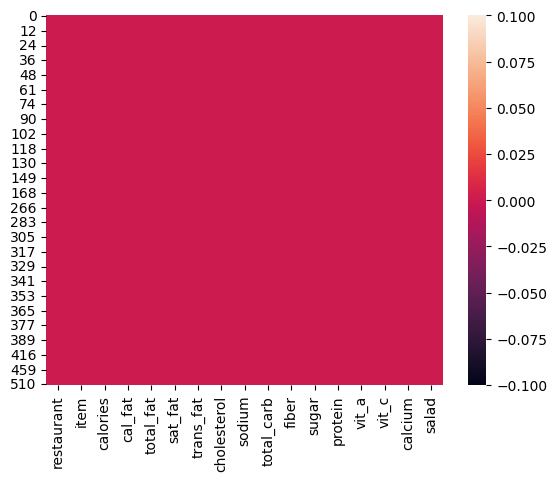

In [21]:
sns.heatmap(df.isnull())

In [22]:
df.describe()

,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,537.009967,229.501661,25.554817,7.848837,0.455150,75.232558,1273.920266,47.534884,4.196013,8.176080,30.186047,18.857143,20.122924,24.976744
std,298.238769,168.098793,18.591248,6.190684,0.787707,54.812825,724.823252,27.555573,3.052559,7.548878,18.481485,31.384330,30.723957,25.643117
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,340.000000,120.000000,13.000000,4.000000,0.000000,40.000000,830.000000,30.000000,2.000000,4.000000,18.000000,4.000000,4.000000,8.000000
50%,490.000000,200.000000,22.000000,7.000000,0.000000,65.000000,1120.000000,44.000000,4.000000,7.000000,28.000000,10.000000,10.000000,20.000000
75%,680.000000,310.000000,34.000000,10.000000,1.000000,95.000000,1550.000000,61.000000,5.000000,10.000000,37.000000,20.000000,30.000000,35.000000
max,2430.000000,1270.000000,141.000000,36.000000,4.000000,475.000000,6080.000000,156.000000,16.000000,87.000000,186.000000,180.000000,400.000000,290.000000


# Visualisasi Data

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2552\2675538813.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

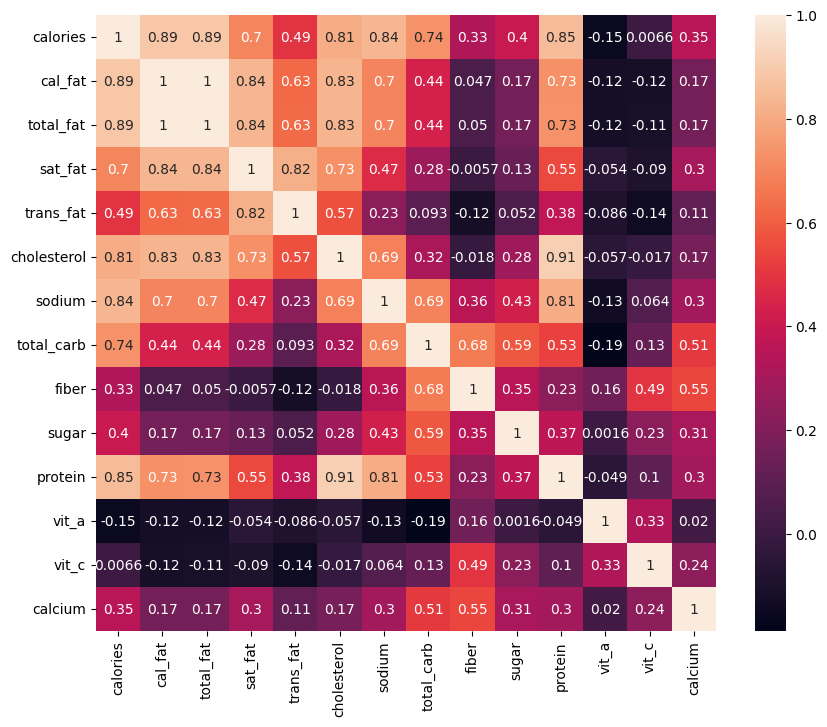

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

# jumlah kalori berdasarkan item (menu makanan)

In [24]:
models = df.groupby('item').count()[['calories']].sort_values(by='calories',ascending=True).reset_index()
models = models.rename(columns={'calories':'menu'})

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

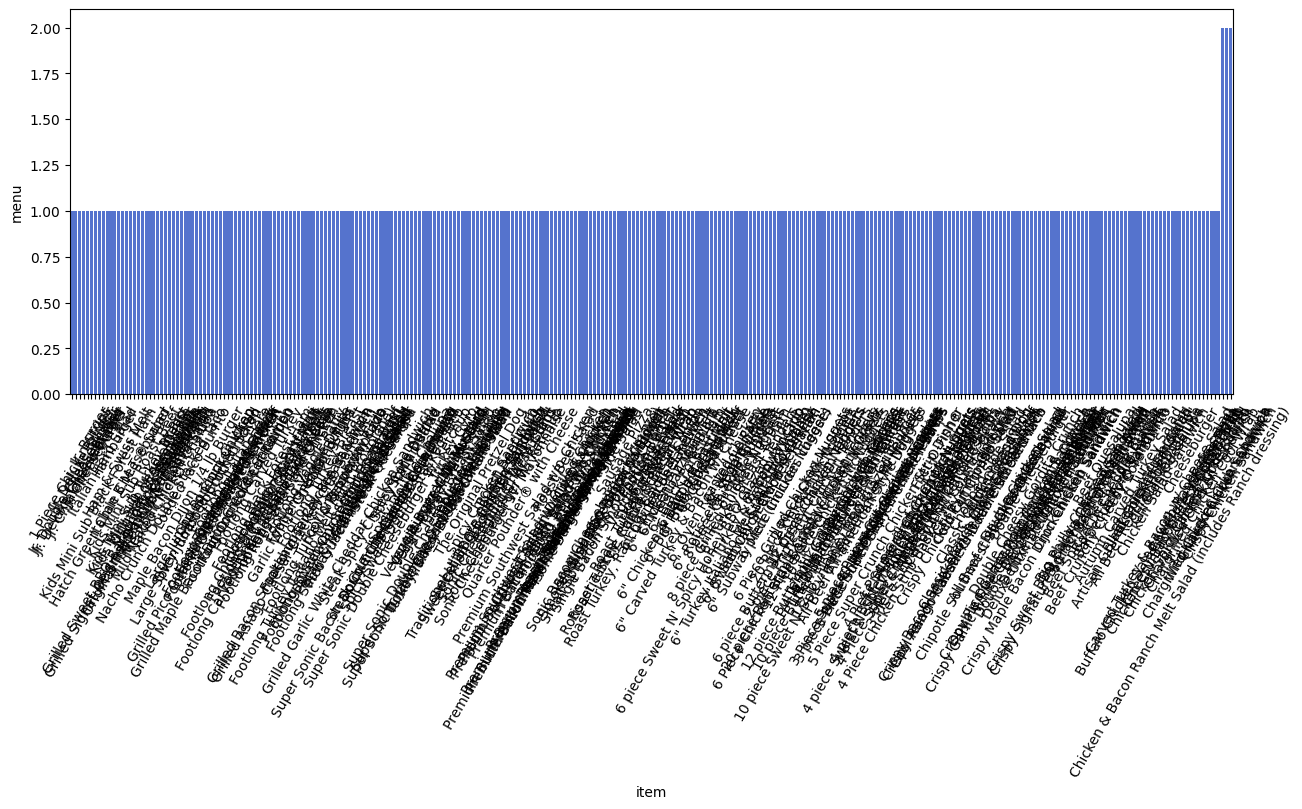

In [25]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=models['item'], y=models['menu'], color='royalblue')
plt.xticks(rotation=60)

# distribusi kalori

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2552\132236051.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['calories'])


<Axes: xlabel='calories', ylabel='Density'>

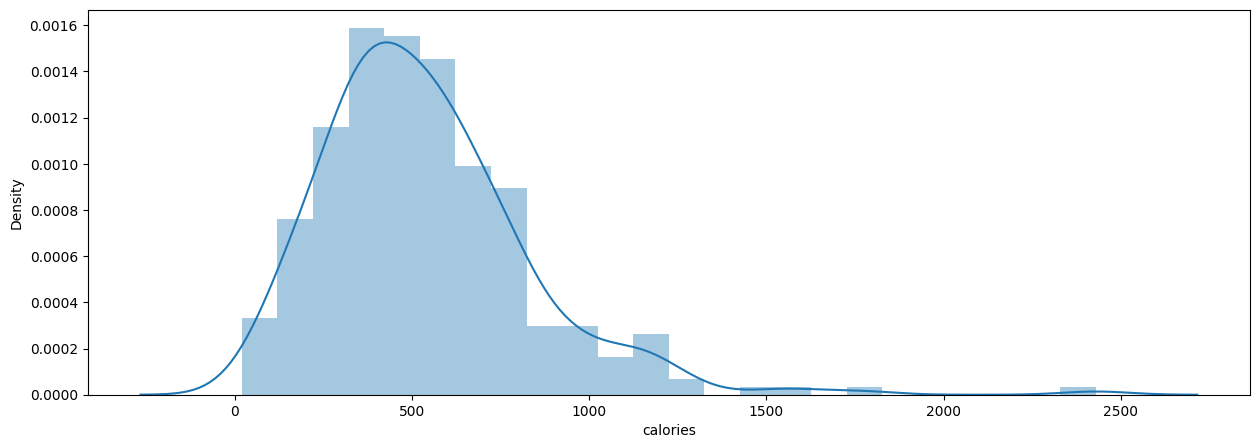

In [26]:
plt.figure(figsize=(15,5))
sns.distplot(df['calories'])

# seleksi fitur

In [28]:
features = ['cal_fat', 'total_fat', 'sat_fat','trans_fat', 'cholesterol', 'sodium', 'total_carb', 'fiber', 'sugar','protein', 'calcium']
x = df[features]
y = df['calories']
x.shape, y.shape

((301, 11), (301,))

# split data training dan data testing

In [29]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(76,)

# membuat model regresi linier

In [30]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)

In [31]:
score = lr.score(X_test, y_test)
print('akurasi model regresi linier = ', score)

akurasi model regresi linier =  0.9909476918553553


# membuat inputan model regresi linier

In [32]:
#'cal_fat','total_fat','trans_fat'
#cal_fat=190, total_fat=21, sat_fat=1,trans_fat=2.3, cholesterol=105, sodium=1030, total_carb=40, fiber=4, sugar=9,protein=43, calcium=15
input_data = np.array([[190,21,1,2.3,105,1030,40,4,9,43,15]])

prediction = lr.predict(input_data)
print('Estimasi kalori berdasarkan jumlah fat :', prediction)

Estimasi kalori berdasarkan jumlah fat : [547.67316518]


C:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# save model

In [33]:
import pickle

filename = 'estimasi_kalori_fastfood.sav'
pickle.dump(lr,open(filename,'wb'))